In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/spotify analysis/spotify_churn_dataset.csv')
display(df.head())

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [5]:
display(df.isnull().sum())

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


None

In [3]:
display(df.describe())

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


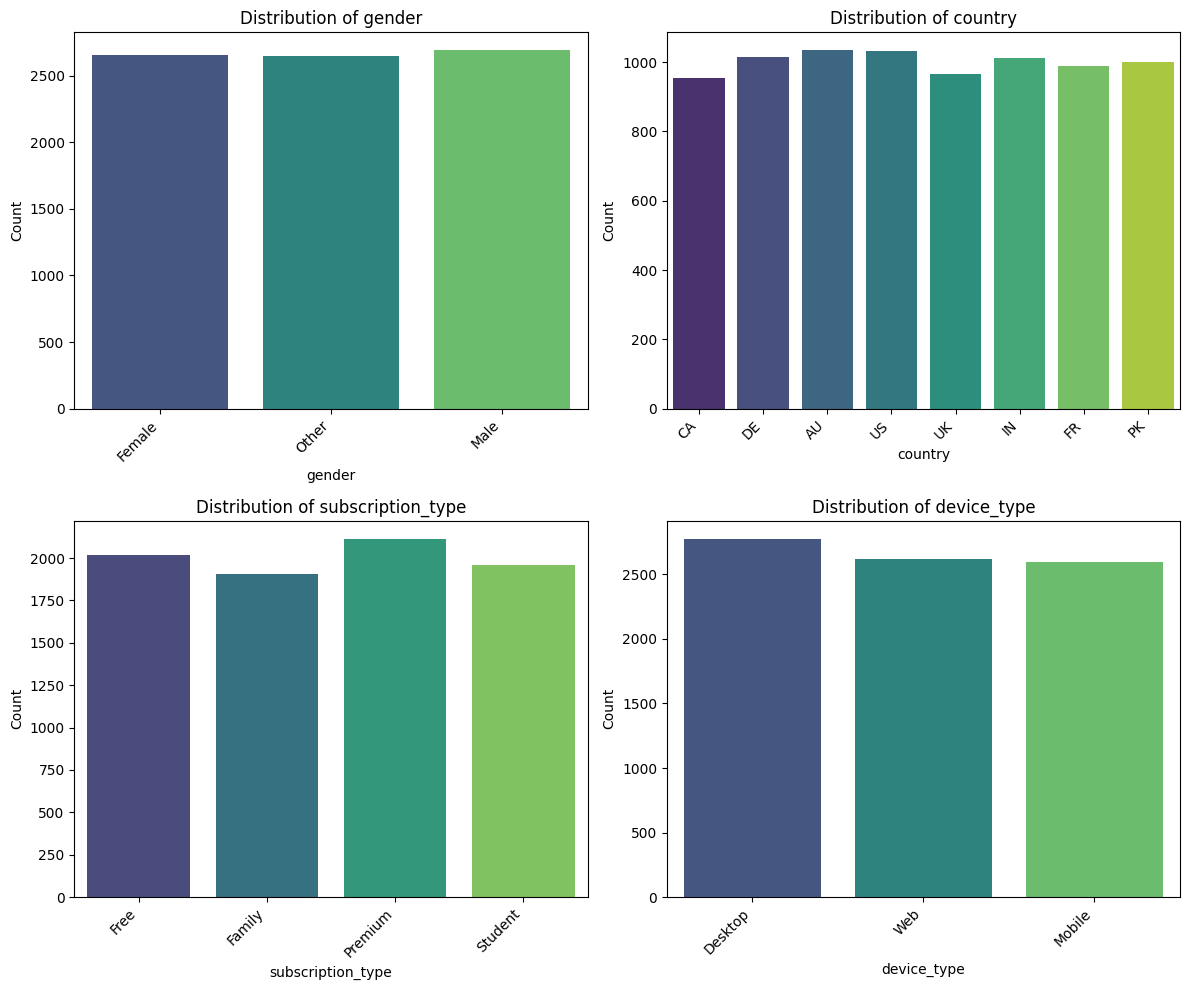

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['gender', 'country', 'subscription_type', 'device_type']

n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

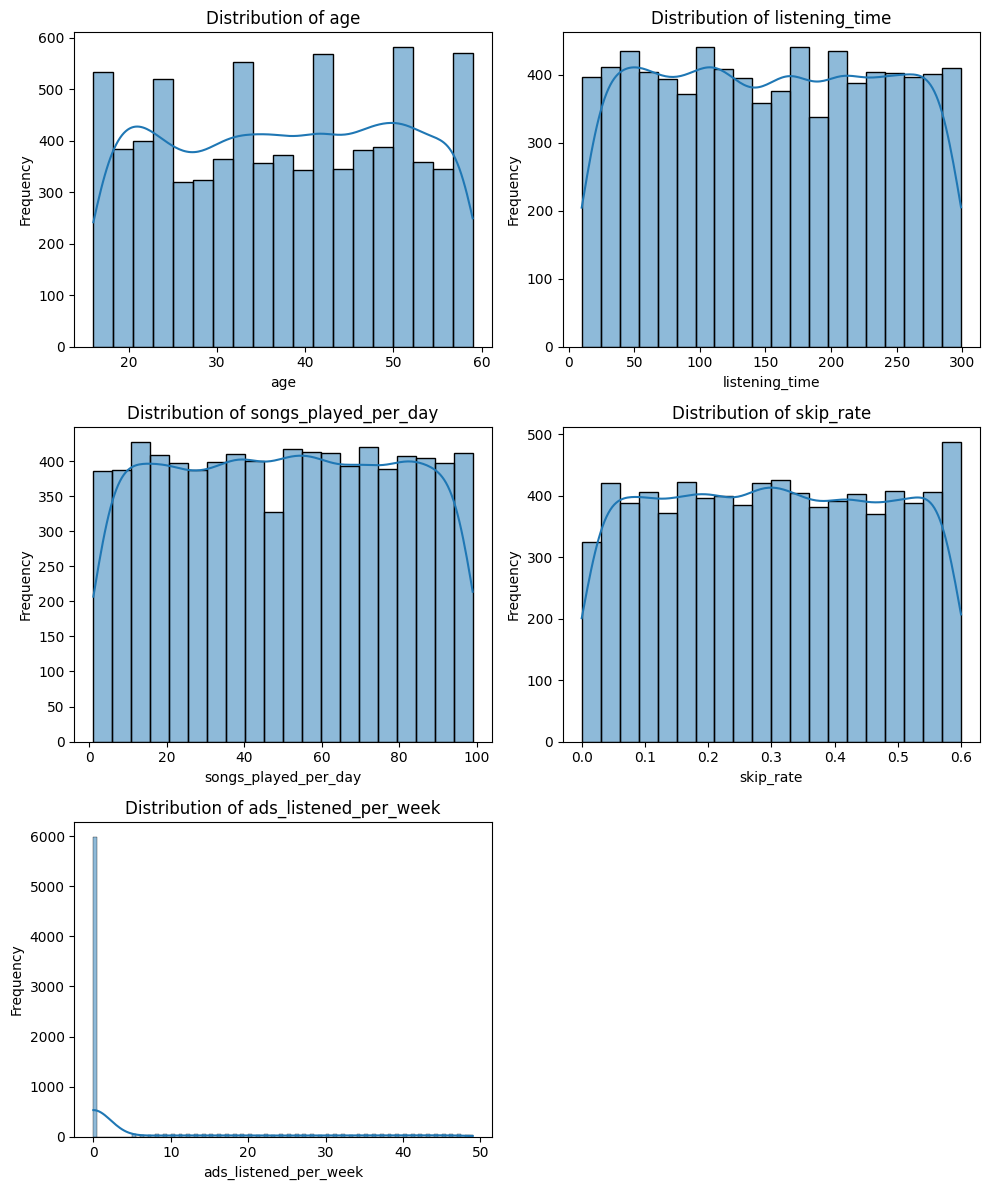

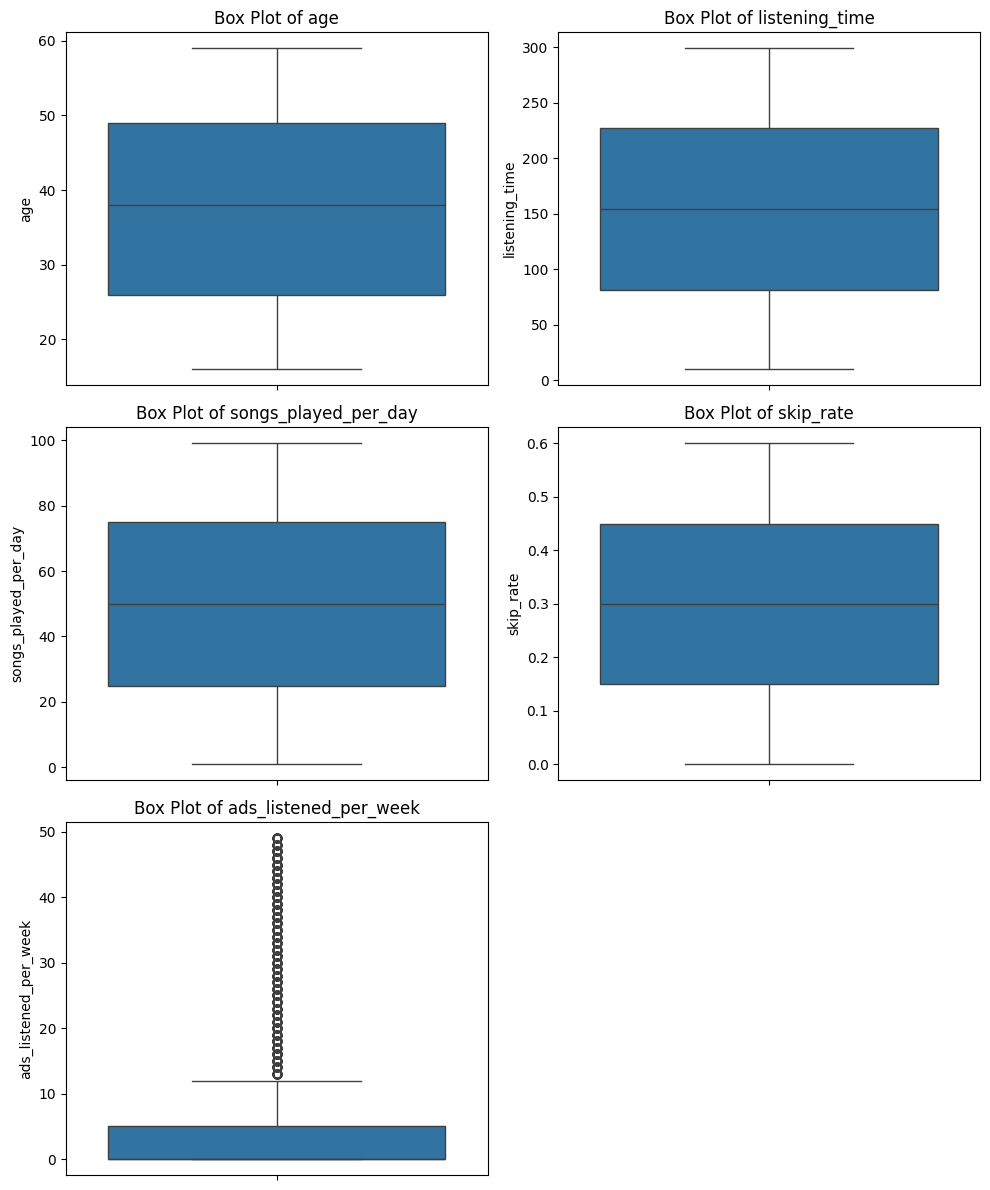

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(10, n_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, n_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

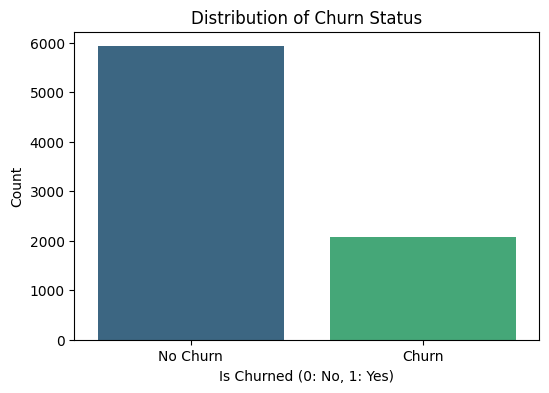

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_churned', palette='viridis', hue='is_churned', legend=False)
plt.title('Distribution of Churn Status')
plt.xlabel('Is Churned (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

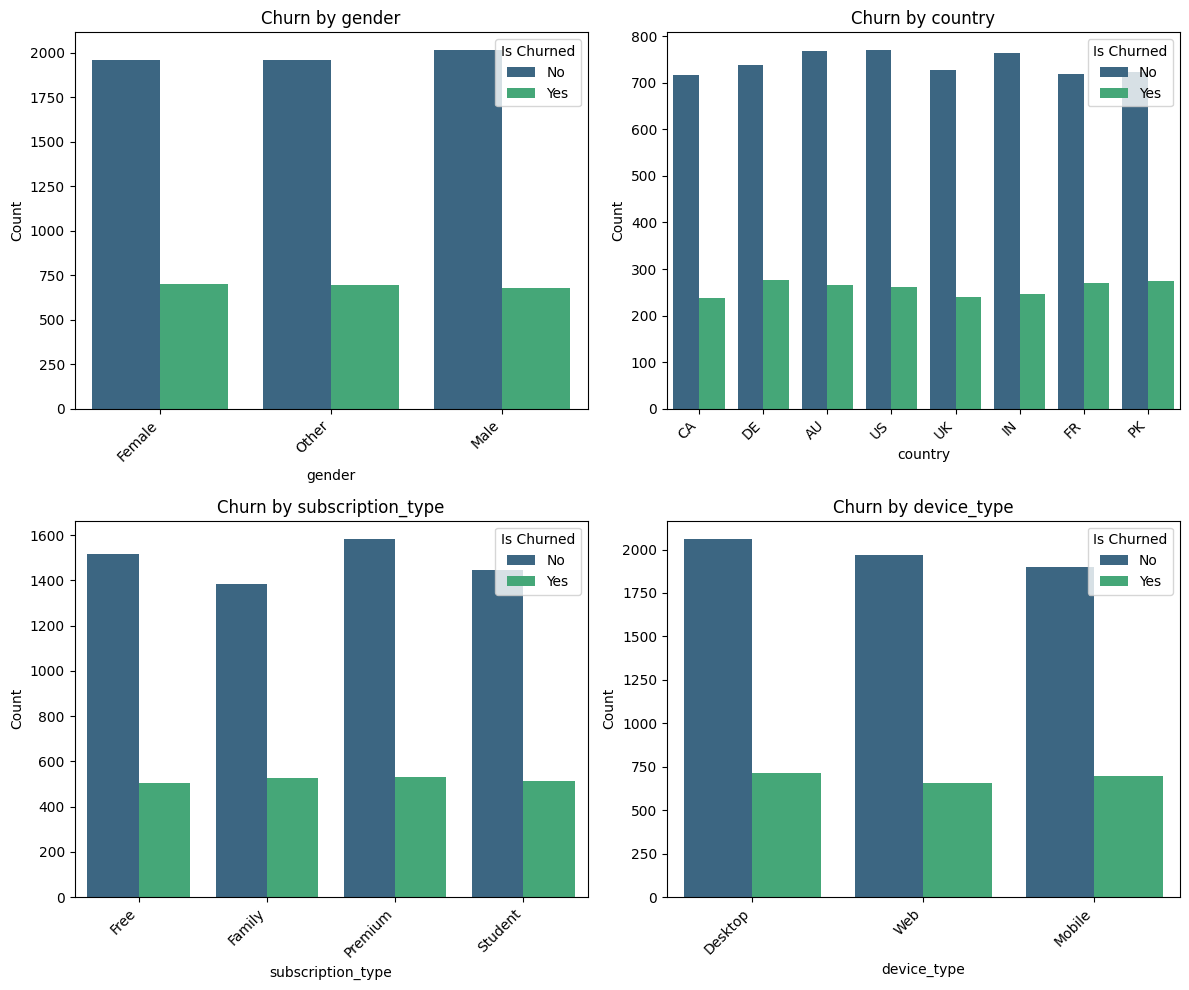

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['gender', 'country', 'subscription_type', 'device_type']

n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='is_churned', palette='viridis')
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Is Churned', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

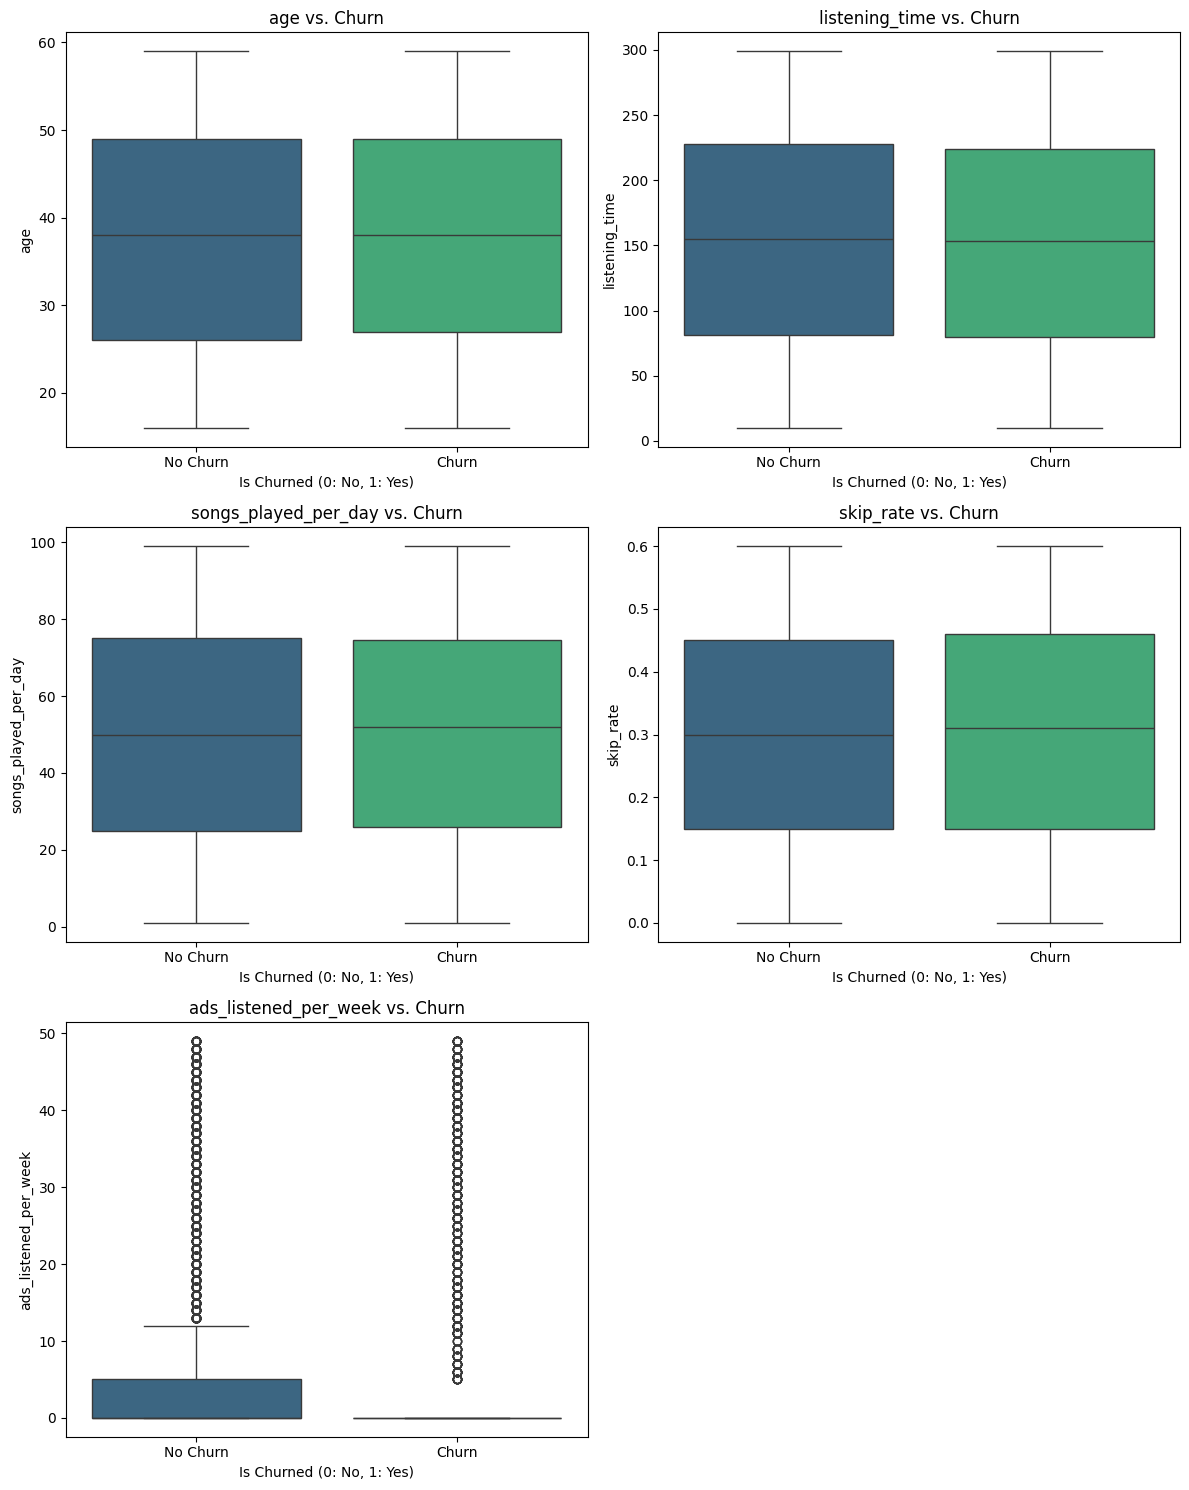

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x='is_churned', y=col, hue='is_churned', palette='viridis', legend=False)
    plt.title(f'{col} vs. Churn')
    plt.xlabel('Is Churned (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

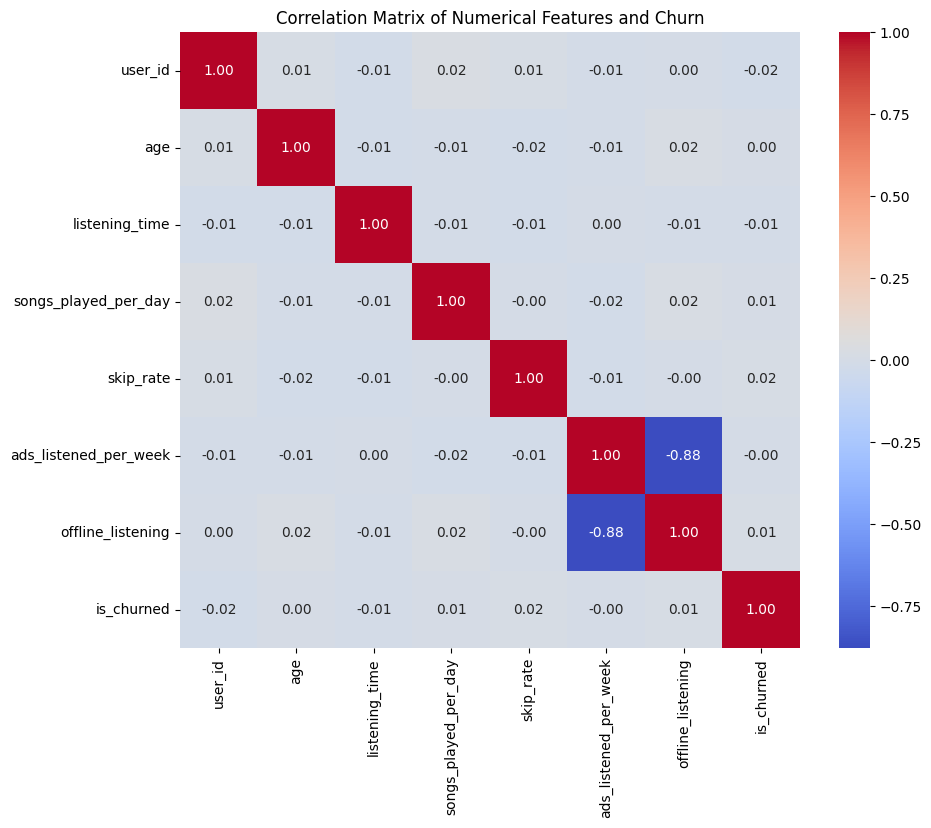

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns and the target variable
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

Weak Correlations with Churn: Most numerical features show very weak linear correlations with is_churned. The correlation values for age, listening_time, songs_played_per_day, skip_rate, and ads_listened_per_week are all close to zero, indicating little to no linear relationship with churn.

Strong Negative Correlation between ads_listened_per_week and offline_listening: There is a strong negative correlation (-0.88) between ads_listened_per_week and offline_listening. This is expected, as users who listen offline likely don't hear ads, and vice versa.

In summary, based solely on linear correlation, none of the numerical features appear to have a strong individual linear relationship with customer churn in this dataset.

In [20]:
X = df.drop(['user_id', 'is_churned'], axis=1)
y = df['is_churned']
display(X.head())
display(y.head())

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening
0,Female,54,CA,Free,26,23,0.20,Desktop,31,0
1,Other,33,DE,Family,141,62,0.34,Web,0,1
2,Male,38,AU,Premium,199,38,0.04,Mobile,0,1
3,Female,22,CA,Student,36,2,0.31,Mobile,0,1
4,Other,29,US,Family,250,57,0.36,Mobile,0,1


,is_churned
0,1
1,0
2,1
3,0
4,1


In [21]:
categorical_cols = ['gender', 'country', 'subscription_type', 'device_type']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
display(X.head())

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_Male,gender_Other,country_CA,country_DE,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
0,54,26,23,0.20,31,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,33,141,62,0.34,0,1,False,True,False,True,False,False,False,False,False,False,False,False,False,True
2,38,199,38,0.04,0,1,True,False,False,False,False,False,False,False,False,False,True,False,True,False
3,22,36,2,0.31,0,1,False,False,True,False,False,False,False,False,False,False,False,True,True,False
4,29,250,57,0.36,0,1,False,True,False,False,False,False,False,False,True,False,False,False,True,False


In [22]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

display(X.head())

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_Male,gender_Other,country_CA,country_DE,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
0,1.282452,-1.524434,-0.953574,-0.576827,1.766611,-1.721720,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,-0.365956,-0.155555,0.417349,0.229702,-0.509938,0.580814,False,True,False,True,False,False,False,False,False,False,False,False,False,True
2,0.026522,0.534836,-0.426296,-1.498575,-0.509938,0.580814,True,False,False,False,False,False,False,False,False,False,True,False,True,False
3,-1.229408,-1.405401,-1.691763,0.056875,-0.509938,0.580814,False,False,True,False,False,False,False,False,False,False,False,True,True,False
4,-0.679939,1.141904,0.241590,0.344921,-0.509938,0.580814,False,True,False,False,False,False,False,False,True,False,False,False,True,False


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6400, 20)
X_test shape: (1600, 20)
y_train shape: (6400,)
y_test shape: (1600,)


In [24]:
print("Original training set class distribution:")
print(y_train.value_counts())

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nResampled training set class distribution:")
print(y_train_res.value_counts())

Original training set class distribution:
is_churned
0    4729
1    1671
Name: count, dtype: int64

Resampled training set class distribution:
is_churned
0    4729
1    4729
Name: count, dtype: int64


## Summary:

### Data Analysis Key Findings

*   Features and the target variable were successfully separated, with `X` containing independent variables and `y` containing the `is_churned` target.
*   Categorical features (`gender`, `country`, `subscription_type`, `device_type`) were successfully one-hot encoded, converting them to a numerical format suitable for modeling.
*   Numerical features were successfully scaled using `StandardScaler`, standardizing their values.
*   The dataset was successfully split into training and testing sets with a test size of 0.2, resulting in 6400 training samples and 1600 testing samples.
*   Class imbalance in the training data was addressed by applying SMOTE, resulting in a balanced distribution of the target variable in the resampled training set.



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Instantiate the models
log_reg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42, probability=True)
gb_model = GradientBoostingClassifier(random_state=42)

# Train the models on the resampled training data
log_reg_model.fit(X_train_res, y_train_res)
dt_model.fit(X_train_res, y_train_res)
rf_model.fit(X_train_res, y_train_res)
svc_model.fit(X_train_res, y_train_res)
gb_model.fit(X_train_res, y_train_res)

print("Models trained successfully.")

Models trained successfully.


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

results = {}

models = {
    "Logistic Regression": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVC": svc_model,
    "Gradient Boosting": gb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    }

results_df = pd.DataFrame(results).T
results_df_sorted = results_df.sort_values(by='F1-score', ascending=False)
display(results_df_sorted)

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Logistic Regression,0.535625,0.262794,0.4750,0.338379,0.518760
Decision Tree,0.586250,0.272569,0.3925,0.321721,0.521667
SVC,0.590625,0.264325,0.3575,0.303932,0.527735
Gradient Boosting,0.626875,0.283516,0.3225,0.301754,0.533192
Random Forest,0.694375,0.324111,0.2050,0.251149,0.543449


## Summary:

### Data Analysis Key Findings

*   Random Forest achieved the highest accuracy (0.6944), highest precision (0.3241), and highest ROC-AUC (0.5434).
*   Logistic Regression obtained the highest recall (0.4750) but the lowest accuracy (0.5356) and precision.
*   Both Random Forest and Gradient Boosting models had the highest F1-score (tied).
*   Considering a balance of metrics, especially F1-score and ROC-AUC, and the importance of recall in churn prediction, Gradient Boosting was selected as the best overall model.

